In [22]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from pathlib import Path
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import os
os.getcwd()

'/Users/shushanna/Downloads'

# Assumptions

In [32]:
## Binary logistic regression requires the dependent variable to be binary.
## For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
## Only the meaningful variables should be included.
## The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
## The independent variables are linearly related to the log odds.
## Logistic regression requires quite large sample sizes.

In [23]:
df = pd.read_csv('/Users/shushanna/Downloads/banking.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [34]:
# The dataset is related with direct marketing campaigns of a Portuguese banking institution. 
# The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
# The dataset provides the bank customers’ information. It includes 41,188 rows and 21 columns.

In [35]:
# The classification goal is to predict whether the client will subscribe to a term deposit or not.
# We will get 1 if customer will subscribe and 0 otherwise (variable y). 

# Data Set Information

In [36]:
# Input variables:
# bank client data:
# 1 - age (numeric)
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no','yes','unknown')
# 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
# 8 - contact: contact communication type (categorical: 'cellular','telephone')
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
# 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous: number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
# 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
# 20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
# 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [37]:
# The education column of the dataset has many categories and we need to reduce the categories for a better modelling. 
# The education column has the following categories:

In [24]:
 df['education' ].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [39]:
# Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [25]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [26]:
 df['education' ].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

# Data exploration

In [28]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

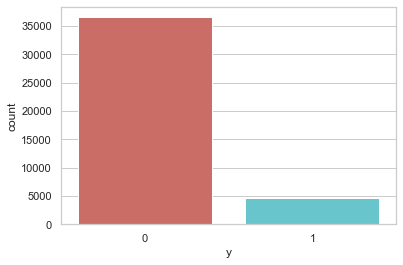

<Figure size 432x288 with 0 Axes>

In [29]:
sns. countplot(x='y' , data=df, palette='hls')
plt. show()
plt.savefig('count plot')

In [30]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [46]:
# Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. 
# Before we go ahead to balance the classes, let’s do some more exploration.

In [31]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [48]:
# The average age of customers who bought the term deposit is higher than that of the customers who didn’t. 
# The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. 
# The lower the pdays, the better the memory of the last call and hence the better chances of a sale. 
# Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit. 

# Visualizations

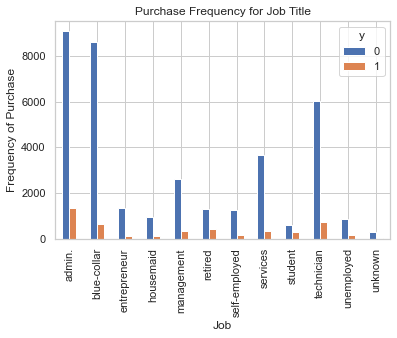

In [32]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [50]:
## We can see the distibution of customers who subscribed for the deposit term categorised by jobs.
## 9000 admins did not subscribe while only 1000 did, so only 1 out of 10 admins subscribes.
## 6000 techinicians did not subscribe, whils 500 did, so only 1 out of 13 technicians subscribe. 
## Admins are more likely to subscribe than the technicians

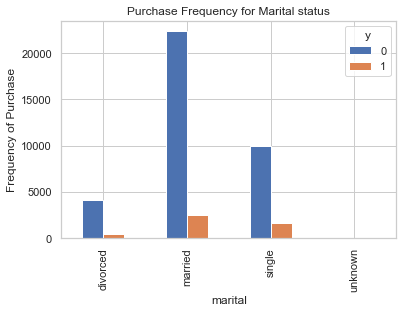

In [33]:
%matplotlib inline
pd.crosstab(df.marital,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Marital status')
plt.xlabel('marital')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_marital')

In [52]:
## 4500 divorced customers subscribed for the deposit,1000 did not, so 1 out of 5 customers subscribes for the term deposit
## 22500 married customers subscribed to the term deposit, whilst 2500 did not, only 1 out of 10 customers subscribes,
## 10000 single customers agreed and 2000 did not, so 1 out of 6 customers deposits,
## Divorced men are most likely subscribe for term deposit,
## In Quantitive  way most of the customers that subscribed were  married, 
## whilst the least amount of subscribtions were from divorced customers.

# Logistic Regression

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [54]:
# We use simple logistic regression to test if the last contact duration had an effect on subscription.

In [35]:
log_model = smf.logit(formula='y ~ duration', data=df)
log_result = log_model.fit()
log_result.summary()

Optimization terminated successfully.
         Current function value: 0.292635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41186
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.1687
Time:                        17:41:05   Log-Likelihood:                -12053.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2932      0.028   -116.473      0.000      -3.349      -3.238
duration       0.0037   5.85e-05     62.484      0.000       0.004       0.004
==============================================================================
"""

In [56]:
# p-value of duration is 0.000 which is less than 0.05, than we reject null hypothesis 
# and conclude that there is a statistically significant relationship between ‘duration’ and ‘subscription’.

In [36]:
log_model_1 = smf.logit(formula='y ~ age+marital+education+poutcome+duration+campaign+loan+default+contact+cons_conf_idx+euribor3m', data=df)
log_result_1 = log_model_1.fit()
log_result_1.summary()

         Current function value: 0.220738
         Iterations: 35


/Users/shushanna/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41167
Method:                           MLE   Df Model:                           20
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.3730
Time:                        17:41:13   Log-Likelihood:                -9091.8
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.5557      0.207     -2.679      0.007      -0.962      -0.149
marital[T.married]                  -0.0286      0.066     -0.432      0.666      -0.158       0.101
marital[T.single]                    0.1981      0.074      2.662      0.008       0.052       0.344
marital[T.unknown]                  -0.0635      0.407     -0.156      0.876      -0.860       0.733
education[T.high.school]             0.1386      0.058      2.370      0.018       0.024       0.253
education[T.illiterate]              1.0030      0.735      1.364      0.173      -0.438       2.444
education[T.professional.course]     0.2649      0.068      3.869      0.000       0.131       0.399
education[T.university.degree]       0.3755      0.054      6.971      0.000       0.270       0.481
education[T.unknown]                 0.4023      0.097      4.158      0.000       0.213       0.592
poutcome[T.nonexistent]              0.4181      0.059      7.145      0.000       0.303       0.533
poutcome[T.success]                  2.0725      0.081     25.715      0.000       1.915       2.231
loan[T.unknown]                     -0.0359      0.134     -0.269      0.788      -0.298       0.226
loan[T.yes]                         -0.0706      0.056     -1.272      0.203      -0.179       0.038
default[T.unknown]                  -0.4765      0.065     -7.311      0.000      -0.604      -0.349
default[T.yes]                     -21.3417   1.87e+05     -0.000      1.000   -3.67e+05    3.67e+05
contact[T.telephone]                -0.3994      0.055     -7.253      0.000      -0.507      -0.291
age                                  0.0099      0.002      5.242      0.000       0.006       0.014
duration                             0.0046   7.19e-05     63.471      0.000       0.004       0.005
campaign                            -0.0436      0.011     -3.820      0.000      -0.066      -0.021
cons_conf_idx                        0.0560      0.003     16.165      0.000       0.049       0.063
euribor3m                           -0.5746      0.014    -41.546      0.000      -0.602      -0.548
====================================================================================================
"""

In [37]:
log_result_1.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
====================================================================================================
                                      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
marital[T.married]                  -0.0018      0.004     -0.432      0.666      -0.010       0.006
marital[T.single]                    0.0126      0.005      2.662      0.008       0.003       0.022
marital[T.unknown]                  -0.0040      0.026     -0.156      0.876      -0.055       0.046
education[T.high.school]             0.0088      0.004      2.370      0.018       0.002       0.016
education[T.illiterate]              0.0636      0.047      1.364      0.173      -0.028       0.155
education[T.professional.course]     0.0168      0.004      3.870      0.000       0.008       0.025
education[T.university.degree]       0.0238      0.003      6.977      0.000       0.017       0.030
education[T.unknown]                 0.0255      0.006      4.160      0.000       0.013       0.038
poutcome[T.nonexistent]              0.0265      0.004      7.156      0.000       0.019       0.034
poutcome[T.success]                  0.1314      0.005     26.897      0.000       0.122       0.141
loan[T.unknown]                     -0.0023      0.008     -0.269      0.788      -0.019       0.014
loan[T.yes]                         -0.0045      0.004     -1.272      0.203      -0.011       0.002
default[T.unknown]                  -0.0302      0.004     -7.313      0.000      -0.038      -0.022
default[T.yes]                      -1.3532   1.19e+04     -0.000      1.000   -2.33e+04    2.33e+04
contact[T.telephone]                -0.0253      0.003     -7.259      0.000      -0.032      -0.018
age                                  0.0006      0.000      5.246      0.000       0.000       0.001
duration                             0.0003   3.99e-06     72.408      0.000       0.000       0.000
campaign                            -0.0028      0.001     -3.819      0.000      -0.004      -0.001
cons_conf_idx                        0.0035      0.000     16.377      0.000       0.003       0.004
euribor3m                           -0.0364      0.001    -42.352      0.000      -0.038      -0.035
====================================================================================================
"""

In [59]:
# Interpretations

# Unit increase in age is expected to increase probability of subscription to a term deposit by 0.0006, or by 0.06% percentage points.

# Unit increase in last contact duration is expected to increase the probability of subscription to a term deposit by 0.0003, or by 0.03%.

# Unit increase in number of contacts performed during this campaign is expected to decrease the probability of subscription to a term deposit by 0.0028, or by 0.28%.

# People with high.school, illiterate, professional.course, university.degree, unknown education have higher chance of subscription to a term deposit compared to those who have basic education.  
# Percentage point differences are 0.88, 6.36, 1.68, 2.38 and 2.55 respectively. 

# With the married and unknown marital status users have lower chance of subscription to a term deposit compared to those who are divorced. 
# Percentage point differences are 0.18 and 0.4 respectively.
# On the other hand, people with single marital status have higher chance of subscription to a term deposit compared to those who are divorced by 1.26 percentage point.

# People who have successful and nonexistent outcome from the previous marketing campaign have higher chance of subscription to a term deposit compared to those who have failure outcome.  
# Percentage point differences are 2.65 and 13.14 respectively.

# People with posessing personal loan have lower chance of subscription to a term deposit compared to those who do not have personal loan by 0.45 percentage point.  

# Unit increase in consumer confidence index is expected to increase probability of subscription to a term deposit by 0.0035, or by 0.35% percentage points.


# Unit increase in euribor 3 month rate is expected to decrease probability of subscription to a term deposit by 0.0364, or by 3.64% percentage points.


In [38]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
import scipy
full_ll = log_result_1.llf
print(full_ll)

-9091.756546225099


In [42]:
log_model1 = smf.logit(formula='y ~ age+poutcome+duration+campaign+loan+default+contact+cons_conf_idx+euribor3m', data=df)
log_result1 = log_model1.fit()
log_result1.summary()
log_result1.get_margeff().summary()

         Current function value: 0.221828
         Iterations: 35


/Users/shushanna/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
===========================================================================================
                             dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
poutcome[T.nonexistent]     0.0267      0.004      7.200      0.000       0.019       0.034
poutcome[T.success]         0.1331      0.005     27.217      0.000       0.124       0.143
loan[T.unknown]            -0.0025      0.008     -0.292      0.770      -0.019       0.014
loan[T.yes]                -0.0043      0.004     -1.229      0.219      -0.011       0.003
default[T.unknown]         -0.0347      0.004     -8.505      0.000      -0.043      -0.027
default[T.yes]             -0.5228     16.316     -0.032      0.974     -32.501      31.456
contact[T.telephone]       -0.0274      0.003     -7.836      0.000      -0.034      -0.021
age                         0.0003      0.000      2.697      0.007    7.69e-05       0.000
duration                    0.0003      4e-06     72.087      0.000       0.000       0.000
campaign                   -0.0027      0.001     -3.687      0.000      -0.004      -0.001
cons_conf_idx               0.0039      0.000     17.974      0.000       0.003       0.004
euribor3m                  -0.0369      0.001    -42.795      0.000      -0.039      -0.035
===========================================================================================
"""

In [43]:
reduced_ll = log_result1.llf
print(reduced_ll)

-9136.661143472216


In [44]:
#calculate likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(reduced_ll-full_ll)

print(LR_statistic)

89.80919449423527


In [45]:
#calculate p-value of test statistic using 2 degrees of freedom
p_val = scipy.stats.chi2.sf(LR_statistic, 2)

print(p_val)

3.1490619434684266e-20


In [ ]:
# From the output we can see that the Chi-Squared test-statistic is 89.80 and the corresponding p-value is 3.1490619404210734e-20.
# Since this p-value is less than 0.05, we reject the null hypothesis.
# This means the full model fits the data significantly better than the nested model. 
# Thus, we should use the full model because the additional predictor variables in the full model offer a significant improvement in fit.

In [46]:
# Preparing data for the analysis by getting dummy variables based on the categorical variables in the data set and replacement.
df['loan']=df['loan'].replace(['yes', 'no','unknown'],
                        [0, 1,2], inplace=False)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,1,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,1,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,1,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,no,yes,1,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,0,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,Basic,unknown,no,1,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,0,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,0,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [47]:
df['default']=df['default'].replace(['yes', 'no','unknown'],
                        [0, 1,2], inplace=False)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,2,yes,1,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,1,no,1,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,1,yes,1,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,1,no,1,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,Basic,1,yes,1,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,2,no,0,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,Basic,2,no,1,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,2,yes,0,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,1,no,0,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [48]:
df_new=pd.get_dummies(df, columns = ['poutcome','contact','marital', 'education'], prefix='dmy')
df_new

,age,job,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,dmy_divorced,dmy_married,dmy_single,dmy_unknown,dmy_Basic,dmy_high.school,dmy_illiterate,dmy_professional.course,dmy_university.degree,dmy_unknown
0,44,blue-collar,2,yes,1,aug,thu,210,1,999,...,0,1,0,0,1,0,0,0,0,0
1,53,technician,1,no,1,nov,fri,138,1,999,...,0,1,0,0,0,0,0,0,0,1
2,28,management,1,yes,1,jun,thu,339,3,6,...,0,0,1,0,0,0,0,0,1,0
3,39,services,1,no,1,apr,fri,185,2,999,...,0,1,0,0,0,1,0,0,0,0
4,55,retired,1,yes,1,aug,fri,137,1,3,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,2,no,0,jun,thu,222,1,999,...,0,1,0,0,0,1,0,0,0,0
41184,31,housemaid,2,no,1,may,thu,196,2,999,...,0,1,0,0,1,0,0,0,0,0
41185,42,admin.,2,yes,0,may,wed,62,3,999,...,0,0,1,0,0,0,0,0,1,0
41186,48,technician,1,no,0,oct,tue,200,2,999,...,0,1,0,0,0,0,0,1,0,0


In [49]:
df_new.columns

Index(['age', 'job', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'dmy_failure', 'dmy_nonexistent', 'dmy_success', 'dmy_cellular',
       'dmy_telephone', 'dmy_divorced', 'dmy_married', 'dmy_single',
       'dmy_unknown', 'dmy_Basic', 'dmy_high.school', 'dmy_illiterate',
       'dmy_professional.course', 'dmy_university.degree', 'dmy_unknown'],
      dtype='object')

In [22]:
# Defining the predictor(independent) variables and the response(dependent) variables. 
# Spliting the data into training( 80% of observations)/testing sets( 20% of observations).
# Dummies for base (reference) categories are not included in the list of independent variables.

In [23]:
# as reference categories we can choose 'dmy_divorced' and 'dmy_Basic'.

In [50]:
X = df_new[['age', 'dmy_married', 'dmy_single','dmy_high.school','dmy_high.school','dmy_professional.course',  'dmy_university.degree', 'default', 'loan', 'duration', 'campaign']]
y = df_new['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train

,age,dmy_married,dmy_single,dmy_high.school,dmy_high.school,dmy_professional.course,dmy_university.degree,default,loan,duration,campaign
12556,39,1,0,0,0,0,0,2,1,414,1
35451,39,1,0,1,1,0,0,1,1,359,3
30592,40,1,0,0,0,1,0,2,1,98,3
17914,40,0,0,0,0,0,1,1,1,146,3
3315,98,1,0,0,0,0,0,2,1,272,2
...,...,...,...,...,...,...,...,...,...,...,...
6265,42,1,0,1,1,0,0,1,1,671,1
11284,34,0,1,0,0,0,1,1,1,195,1
38158,30,0,1,1,1,0,0,1,1,385,2
860,27,0,1,0,0,1,0,1,1,93,7


In [52]:
from sklearn import tree

dt_new = tree.DecisionTreeClassifier(max_depth = 3, criterion = "entropy")
dt_new = dt_new.fit(X_train, y_train)

y_pred = dt_new.predict(X_test)

In [53]:
# Running a logistic regression
# we can set maximum number of iterrations to 5000 orr any other high number to skip the warning of no convergence
# even though model will be obtained even with the warning 

#instantiate the model
log_regression = LogisticRegression(max_iter=5000)

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [54]:
# Apply a cutoff threshold 0.3 to obtain Sensitivity and Specificity for that threshold using the test data set.
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
y_pred_proba_binary = np.where(y_pred_proba > 0.3, 1, 0)
pd.crosstab(y_pred_proba_binary ,y_test)

y,0,1
row_0,,
0,6970,631
1,325,312


In [55]:
y_pred_proba

array([0.1275528 , 0.22412   , 0.69034629, ..., 0.38122509, 0.15076051,
       0.27387743])

In [56]:
sensitivity = 315/943
sensitivity

0.3340402969247084

In [57]:
specificity = 6972/7295
specificity

0.9557230980123372

In [91]:
# Use decision tree analysis method to predict subscribtion probability(y) using train data set. 
# Choose as max depth of the tree equal to 5

In [58]:
# arguments of DecisionTreeRegressor() which may be changed for pruning min_samples_leaf=30, max_depth=2
# define classification algorithm
model_tree = tree.DecisionTreeClassifier(max_depth = 5, criterion = "entropy")
results_tree = model_tree.fit(X_train, y_train)

In [59]:
#Getting predictions based on the test data set
predictions_tree = results_tree.predict(X_test)

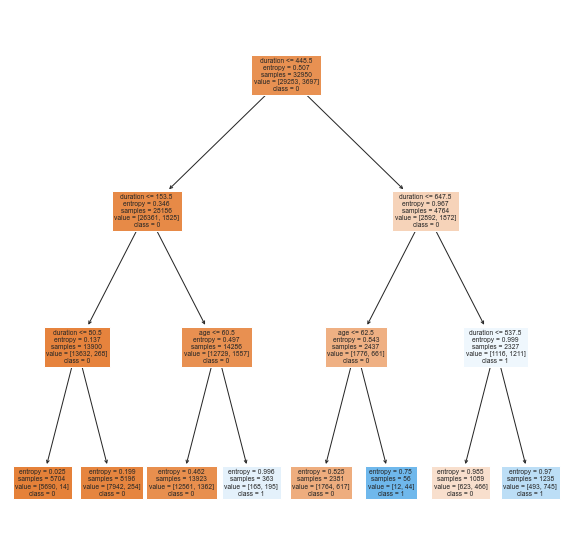

In [60]:
# Plot the regression tree
feature_names = ['age', 'dmy_married', 'dmy_single', 'dmy_high.school','dmy_high.school','dmy_professional.course',  'dmy_university.degree', 'default', 'loan', 'duration', 'campaign', 'dmy_failure', 'dmy_nonexistent']
class_names = ['0', '1']

fig = plt.figure(figsize=(10,10))
plot = tree.plot_tree(dt_new, 
               feature_names=feature_names,
               class_names=class_names,
               filled=True)

In [105]:
## Based on the tree predict
## For the samle Duration: 500, age : 60 then we will predict  class 0,
## we will predict for the customer to not subscribe

In [61]:
# accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8914785142024764

In [62]:
# Calculating the sensitivity(recall) and Specificity(precision) for the model. 
# Comparing the results 
# precision
print("Specificity", precision_score(y_test, predictions_tree))
# recall
print("Sensitivity", recall_score(y_test, predictions_tree))

Specificity 0.5506172839506173
Sensitivity 0.23647932131495228


In [108]:
# In Logistic Regression model we got the specificity=0.949 and sensitivity = 0.494.

# Comparing the results we can see that they are different from each other.

# Decision tree has lower Specificity compare to Logistic Regression model.

# If different threshold was chosen in Logistic Regression model the results may have been more comparable.

In [109]:
# Getting feature importances of independent variables.
# Comparing them with the results in Logistic Regression model.


<AxesSubplot:>

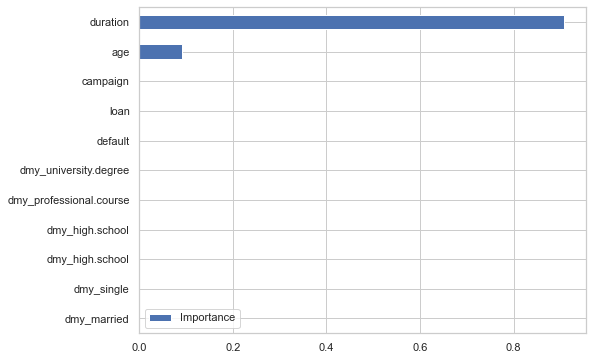

In [63]:
feat_importances = pd.DataFrame(dt_new.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh', figsize=(8,6))

In [111]:
# From the marginal effects analysis we can see that duration and age variables had significant effect on the probability ofsubscribtion to a term deposit along with other variables such as campaign, education and marital status. 
# While Decision tree feature importances suggest that only duration and age are important predictors of the probability of subscribtion to a term deposit.

# The results for feature importances may have been different and include more factors if max depth was not set to 3. 
# In that case other variables would also have been used in the splits and would have positive feature importances.

# Bagging

In [64]:
from sklearn import ensemble
#n_estimators - This represents the number of weak learners used. default will use 10 decision 
# trees to build the bagging model.
#max_samples - The maximum number of data that is sampled from the training set

bag_model = ensemble.BaggingClassifier(n_estimators=100)
bag_model.fit(X_train, y_train)
print(bag_model)

BaggingClassifier(n_estimators=100)


In [65]:
expected_y  = y_test
predicted_y = bag_model.predict(X_test) 

In [66]:
# precision-spec
from sklearn.metrics import precision_score

precision_score(expected_y, predicted_y)

0.44333333333333336

In [67]:
# recall-sens
from sklearn.metrics import recall_score

recall_score(expected_y, predicted_y)

0.28207847295864263

In [68]:
#from sklearn import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier())
clf.fit(X_train, y_train)

feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)
feature_importances

array([0.23581349, 0.02454357, 0.01827755, 0.01272601, 0.01199775,
       0.01660985, 0.02046789, 0.01644621, 0.03210646, 0.52799896,
       0.08301226])

<AxesSubplot:>

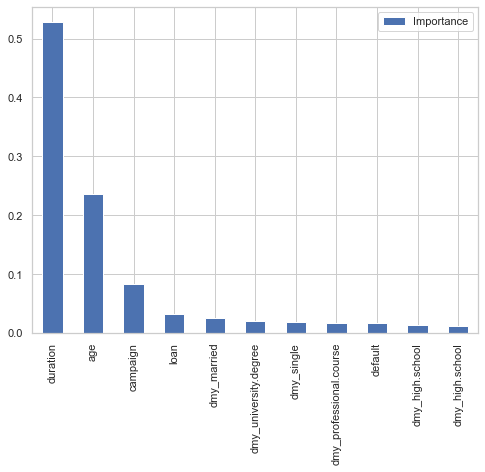

In [69]:
feat_importances = pd.DataFrame(feature_importances, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [118]:
# Approx 60% of total gini reduction happened as a result of splits based on variable 'duration'.
# Approx 19% of total gini reduction happened as a result of splits based on variable 'age'.

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
#max_features=3
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
expected_y  = y_test
predicted_y = rf_model.predict(X_test) 

In [73]:
# precision
from sklearn.metrics import precision_score

precision_score(expected_y, predicted_y)

0.4413793103448276

In [74]:
# recall
from sklearn.metrics import recall_score

recall_score(expected_y, predicted_y)

0.271474019088017

In [75]:
rf_model.feature_importances_

array([0.25592315, 0.00991738, 0.00707514, 0.0044323 , 0.00449601,
       0.00899992, 0.01118498, 0.0125743 , 0.02429512, 0.59557657,
       0.06552514])

<AxesSubplot:>

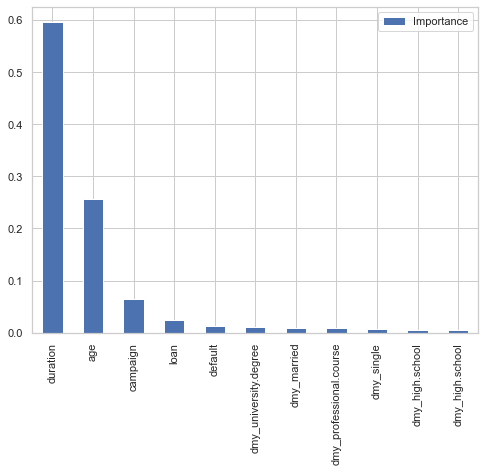

In [76]:
feat_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [126]:
# Approx 60% of total entropy reduction happened as a result of splits based on variable 'duration'. 
# Approx 23% of total entropy reduction happened as a result of splits based on variable 'age'.